import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Read the dataset

In [38]:
from google.colab import files
#uploaded = files.upload()
data=pd.read_csv("/content/ahmedabad.csv")
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,1/1/2015,27,15,0,10.8,6,72,3:07 PM,3:36 AM,7:21 AM,6:05 PM,12,20,20,20,33,11,61,0.4,1011,27,10,62,20,ahmedabad
1,1/2/2015,25,14,0,10.9,6,80,3:55 PM,4:31 AM,7:21 AM,6:06 PM,12,19,20,19,26,6,65,0.0,1014,25,10,70,16,ahmedabad
2,1/3/2015,26,15,0,10.9,6,87,4:45 PM,5:26 AM,7:21 AM,6:07 PM,13,21,21,21,14,1,60,0.0,1015,26,10,90,9,ahmedabad
3,1/4/2015,27,16,0,10.9,6,94,5:37 PM,6:17 AM,7:22 AM,6:07 PM,9,21,21,22,22,0,46,0.0,1017,27,10,68,13,ahmedabad
4,1/5/2015,27,14,0,10.9,6,100,6:28 PM,7:07 AM,7:22 AM,6:08 PM,5,20,20,20,24,0,40,0.0,1017,27,10,65,14,ahmedabad


**Set the position of target feature**

In [39]:
t1 = data['tempC']
data.drop(labels=['tempC'], axis=1, inplace = True)
data.insert(1, 'tempC', t1)
data

,date_time,tempC,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,location
0,1/1/2015,27,27,15,0,10.8,6,72,3:07 PM,3:36 AM,7:21 AM,6:05 PM,12,20,20,20,33,11,61,0.4,1011,10,62,20,ahmedabad
1,1/2/2015,25,25,14,0,10.9,6,80,3:55 PM,4:31 AM,7:21 AM,6:06 PM,12,19,20,19,26,6,65,0.0,1014,10,70,16,ahmedabad
2,1/3/2015,26,26,15,0,10.9,6,87,4:45 PM,5:26 AM,7:21 AM,6:07 PM,13,21,21,21,14,1,60,0.0,1015,10,90,9,ahmedabad
3,1/4/2015,27,27,16,0,10.9,6,94,5:37 PM,6:17 AM,7:22 AM,6:07 PM,9,21,21,22,22,0,46,0.0,1017,10,68,13,ahmedabad
4,1/5/2015,27,27,14,0,10.9,6,100,6:28 PM,7:07 AM,7:22 AM,6:08 PM,5,20,20,20,24,0,40,0.0,1017,10,65,14,ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,12/27/2020,29,29,21,0,10.8,7,85,3:54 PM,4:40 AM,7:19 AM,6:03 PM,6,25,25,24,17,0,33,0.0,1013,10,219,11,ahmedabad
2188,12/28/2020,25,25,14,0,10.8,6,92,4:37 PM,5:34 AM,7:19 AM,6:03 PM,-9,19,20,19,20,0,15,0.0,1015,10,100,13,ahmedabad
2189,12/29/2020,25,25,12,0,10.8,5,100,5:26 PM,6:29 AM,7:20 AM,6:04 PM,-7,17,18,17,26,0,17,0.0,1015,10,49,16,ahmedabad
2190,12/30/2020,25,25,13,0,10.8,6,100,6:18 PM,7:24 AM,7:20 AM,6:04 PM,-3,18,19,18,27,0,24,0.0,1015,10,44,17,ahmedabad


**We removed few of the columns which were irrelevant or redundant or the columns which had all null values**

In [40]:
data.drop(["maxtempC","mintempC","moonrise", "moonset","sunrise","sunset","location","totalSnow_cm","FeelsLikeC"], axis = 1, inplace = True) 
data.drop(["date_time"],axis = 1, inplace = True)
data

,tempC,sunHour,uvIndex,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph
0,27,10.8,6,72,12,20,20,33,11,61,0.4,1011,10,62,20
1,25,10.9,6,80,12,20,19,26,6,65,0.0,1014,10,70,16
2,26,10.9,6,87,13,21,21,14,1,60,0.0,1015,10,90,9
3,27,10.9,6,94,9,21,22,22,0,46,0.0,1017,10,68,13
4,27,10.9,6,100,5,20,20,24,0,40,0.0,1017,10,65,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,29,10.8,7,85,6,25,24,17,0,33,0.0,1013,10,219,11
2188,25,10.8,6,92,-9,20,19,20,0,15,0.0,1015,10,100,13
2189,25,10.8,5,100,-7,18,17,26,0,17,0.0,1015,10,49,16
2190,25,10.8,6,100,-3,19,18,27,0,24,0.0,1015,10,44,17


# **Feature Selection Process**

(1) Select the input fetures and output features and then apply Extra Tree classifier to get the importance of the features and plot it.
We selected the threshold value (0.06) for feature importance and remove the features which has less importance value than our threshold.

[0.06027879 0.06847194 0.07541618 0.07343975 0.10113288 0.1203831
 0.07412321 0.07656129 0.09158597 0.02353007 0.07328991 0.01476921
 0.07797565 0.06904203]


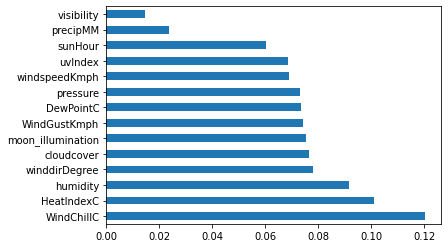

,tempC,uvIndex,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,winddirDegree,windspeedKmph
0,27,6,72,12,20,20,33,11,61,1011,62,20
1,25,6,80,12,20,19,26,6,65,1014,70,16
2,26,6,87,13,21,21,14,1,60,1015,90,9
3,27,6,94,9,21,22,22,0,46,1017,68,13
4,27,6,100,5,20,20,24,0,40,1017,65,14
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,29,7,85,6,25,24,17,0,33,1013,219,11
2188,25,6,92,-9,20,19,20,0,15,1015,100,13
2189,25,5,100,-7,18,17,26,0,17,1015,49,16
2190,25,6,100,-3,19,18,27,0,24,1015,44,17


In [ ]:
X=data.iloc[:,1:15] ## independent features
y=data.iloc[:,0] ## dependent features

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#use inbuilt class feature_importances of tree based classifiers
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
#visualize the importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()
#The value which is less needs to be removed. Thus, in this case we can consider visibility, precipMM and sunHour to be removed.
data.drop(["visibility","precipMM","sunHour"], axis = 1, inplace = True)       
print(data)


X=data.iloc[:,1:12] ## independent features
y=data.iloc[:,0] ## dependent features
m = len(y)

print(X);
print(y);
print(m);
#Extra Tree 

(2) Select the input fetures and output features and then apply Mutual Info classifier to get the importance of the features and plot it.
We selected the threshold value (0.2) for feature importance and remove the features which has less importance value than our threshold.

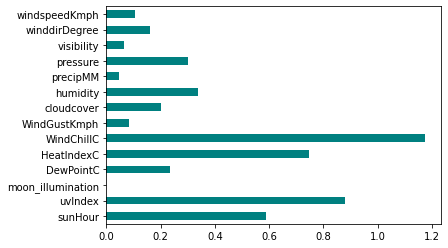

,tempC,sunHour,uvIndex,DewPointC,HeatIndexC,WindChillC,cloudcover,humidity,pressure,winddirDegree
0,27,10.8,6,12,20,20,11,61,1011,62
1,25,10.9,6,12,20,19,6,65,1014,70
2,26,10.9,6,13,21,21,1,60,1015,90
3,27,10.9,6,9,21,22,0,46,1017,68
4,27,10.9,6,5,20,20,0,40,1017,65
...,...,...,...,...,...,...,...,...,...,...
2187,29,10.8,7,6,25,24,0,33,1013,219
2188,25,10.8,6,-9,20,19,0,15,1015,100
2189,25,10.8,5,-7,18,17,0,17,1015,49
2190,25,10.8,6,-3,19,18,0,24,1015,44


In [ ]:
X=data.iloc[:,1:15] ## independent features
y=data.iloc[:,0] ## dependent features

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
#use information gain to get feature importance
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, data.columns[1: len(data.columns)])
#visualize the importance
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

#The value which is less needs to be removed. Thus, in this case we can consider moon_illumination,	WindGustKmph, pressure, visibility and windspeedKmph to be removed .
data.drop(["moon_illumination","precipMM","WindGustKmph","visibility","windspeedKmph"], axis = 1, inplace = True) 
data

#moon_illumination	WindGustKmph precipMM	visibility	windspeedKmph
#thresold = WinddirDegree

data
X=data.iloc[:,1:10] ## independent features
y=data.iloc[:,0] ## dependent features
m = len(y)

print(X);
print(y);
print(m);
#Information gain

**Feature selection using Backward elimination**

In [ ]:
!python -m pip install statsmodels 

(3) Next, we have used Backward Feature Elimination under wrapper methods. Here we have done in such a way that if p-value is greater than 0.05, then those features are removed. Below, we have show the p-values of different features. 
Thus based on this table, we removed visibility and pressure.


In [41]:
import statsmodels.api as sm
X=data.iloc[:,1:15] ## independent features
y=data.iloc[:,0] ## dependent features

#Backward Elimination
cols = list(X.columns)#select the columns
pmax = 1
while (len(cols)>0):
    p= []  #to store pvalues
    X_1 = X[cols] #assign to different variable
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p) #selct maximum p value
    feature_with_p_max = p.idxmax()  #selct maximum p value feature
    if(pmax>0.05):     #threshold value
        cols.remove(feature_with_p_max) #selct feature based on thresold
    else:
        break
selected_features = cols
print(selected_features)

#removing visibility and pressure
data.drop(["visibility","pressure"], axis = 1, inplace = True) 
data

X=data.iloc[:,1:13] ## independent features
y=data.iloc[:,0] ## dependent features
m = len(y)
print(X);
print(y);
print(m);
#Backward elimination


const                7.974191e-01
sunHour              1.239339e-04
uvIndex              1.749297e-19
moon_illumination    2.561761e-02
DewPointC            5.800048e-07
HeatIndexC           1.309361e-29
WindChillC           1.793099e-95
WindGustKmph         3.153129e-25
cloudcover           1.687684e-15
humidity             2.759541e-04
precipMM             6.244538e-10
pressure             5.534947e-01
visibility           7.463637e-01
winddirDegree        1.656637e-07
windspeedKmph        1.054076e-10
dtype: float64
['sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'winddirDegree', 'windspeedKmph']
      sunHour  uvIndex  ...  winddirDegree  windspeedKmph
0        10.8        6  ...             62             20
1        10.9        6  ...             70             16
2        10.9        6  ...             90              9
3        10.9        6  ...             68             13
4        10.

(4) Next, we perform Feature selection using correlation matrix. We Performed Pearson correlation and got correlation matrix and then did Visualisation of the correlation matrix using heatmap

,tempC,sunHour,moon_illumination,DewPointC,HeatIndexC,WindGustKmph,cloudcover,humidity,precipMM,pressure,winddirDegree,windspeedKmph
0,27,10.8,72,12,20,33,11,61,0.4,1011,62,20
1,25,10.9,80,12,20,26,6,65,0.0,1014,70,16
2,26,10.9,87,13,21,14,1,60,0.0,1015,90,9
3,27,10.9,94,9,21,22,0,46,0.0,1017,68,13
4,27,10.9,100,5,20,24,0,40,0.0,1017,65,14
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,29,10.8,85,6,25,17,0,33,0.0,1013,219,11
2188,25,10.8,92,-9,20,20,0,15,0.0,1015,100,13
2189,25,10.8,100,-7,18,26,0,17,0.0,1015,49,16
2190,25,10.8,100,-3,19,27,0,24,0.0,1015,44,17


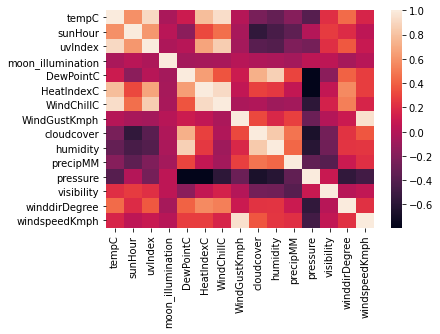

In [ ]:
correlation = data.corr(method='pearson', min_periods=1)
data.corr(method='pearson', min_periods=1)
sns.heatmap(correlation)

#removing coloumns which are highly correlated
data.drop(["WindChillC","visibility","uvIndex"], axis = 1, inplace = True) 
data

X=data.iloc[:,1:12] ## independent features
y=data.iloc[:,0] ## dependent features
m = len(y)
print(X);
print(y);
print(m);
#Correlation

**Split dataset into training and testing dataset to fit the model**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Apply Multiple Linear regression**

In [7]:
# Fitting multiple lineaar regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
print(r2)

0.9578111192573036


In [8]:
print(regressor.coef_)
print(regressor.intercept_)


[ 0.08584264  0.54109646 -0.0011155  -0.06459915  0.25820844  0.62116489
  0.1784463  -0.01724362 -0.02698522 -0.02266274  0.00196584 -0.1650257 ]
3.9617612629547594


     Predicted  Actual
0    33.630528      33
1    29.117661      29
2    35.203537      34
3    31.853404      33
4    28.310424      28
..         ...     ...
434  30.105280      31
435  31.952109      31
436  29.553762      32
437  27.952822      28
438  42.144325      41

[439 rows x 2 columns]


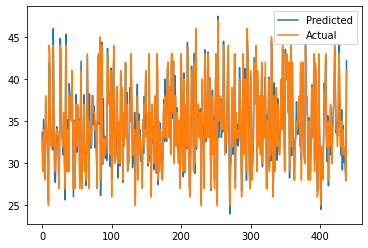

In [9]:
#create dataframe of actual and predicted values
df = pd.DataFrame(y_pred, columns = ['Predicted']) 
y_test = pd.Series(y_test).array
df['Actual'] = y_test
print(df)
df.plot()

**Apply Polynomial Regression**

In [14]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
  
poly = PolynomialFeatures(degree = 2) #Apply Polynomial Regression with degree 2
X_poly = poly.fit_transform(X_train) #transform input features 
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) #train the model
a=lin2.predict(poly.fit_transform(X_test))#test the model


0.9649814203701663
     Predicted  Actual
0    33.415454      33
1    29.337332      29
2    35.112040      34
3    32.106681      33
4    29.191351      28
..         ...     ...
434  29.812567      31
435  30.942735      31
436  29.471821      32
437  27.937796      28
438  40.423203      41

[439 rows x 2 columns]


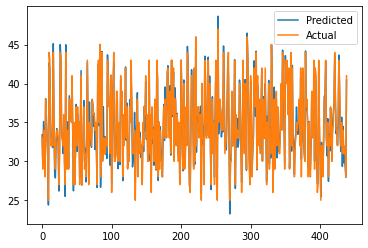

In [15]:
score=lin2.score(poly.fit_transform(X_test),y_test)
print(score)
#create dataframe of actual and predicted values
df1 = pd.DataFrame(a, columns = ['Predicted'])
y_test = pd.Series(y_test).array 
df1['Actual'] = y_test
print(df1)
df1.plot()

**Apply Ridge Regression**

0.9577960004478047
     Predicted  Actual
0    33.597608      33
1    29.122285      29
2    35.200130      34
3    31.866666      33
4    28.301515      28
..         ...     ...
434  30.111275      31
435  31.959628      31
436  29.580395      32
437  27.964745      28
438  42.138891      41

[439 rows x 2 columns]


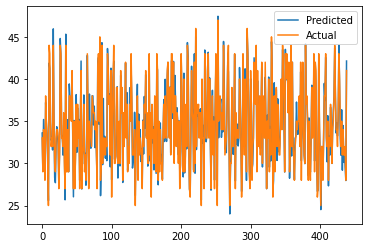

In [27]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001, normalize=True)#Apply Ridge Regression
ridgeReg.fit(X_train,y_train)#train the model
pred = ridgeReg.predict(X_test)

#defining r square measure
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
print(r2(pred,y_test))
#create dataframe of actual and predicted values
df1 = pd.DataFrame(pred, columns = ['Predicted'])
y_test = pd.Series(y_test).array 
df1['Actual'] = y_test
print(df1)
df1.plot()

**Apply Lasso Regression**

0.9577173326205148
     Predicted  Actual
0    33.548528      33
1    29.132162      29
2    35.159744      34
3    31.868343      33
4    28.284014      28
..         ...     ...
434  30.125039      31
435  31.927627      31
436  29.635546      32
437  27.971606      28
438  42.062314      41

[439 rows x 2 columns]


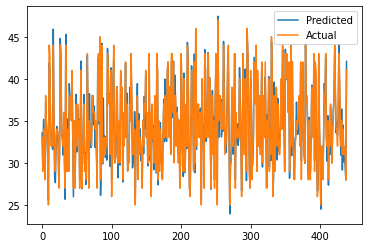

In [28]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.0001, normalize=True)#Apply Lasso Regression
lassoReg.fit(X_train,y_train) #train the model
pred1 = lassoReg.predict(X_test)#test the model
#defining r square measure
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
print(r2(pred1,y_test))
#create dataframe of actual and predicted values
df1 = pd.DataFrame(pred1, columns = ['Predicted'])
y_test = pd.Series(y_test).array 
df1['Actual'] = y_test
print(df1)
df1.plot()

# **Implementing regression algorithm from Scratch**

**Multiple Linear Regression without using inbuilt function:**

First, we scale the features by using standardScaler from sklearn library

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

Now here our hypothesis function F is theta^TX, where theta is the coefficiants and X 
is input data.

Design the cost function which will give the error between the output of hypothesis function and actual value which is

  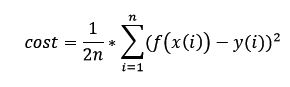 

In [44]:
#defining cost function
def cost(X, Y, theta):
 n = len(Y)
 F=X.dot(theta)
 cost = np.sum((F- Y) ** 2)/(2 * n)
 return cost

alpha = learning rate

iter = number of iterations

In [45]:
#define gradiant descent algorithm
def GradientDescent(X, Y, theta, alpha, iter):
 cost_history = [0] * iter
 n = len(Y)
 
 for iteration in range(iter):
 # Hypothesis function
  F = X.dot(theta)
 # Difference between Hypothesis function value and Actual value Y
  diff = F - Y
 # Gradient Calculation
  gradient = X.T.dot(diff) / n
 # Changing Values of theta using Gradient
  theta = theta - alpha * gradient
 # save the cost on each iteration
  cost_iter = cost(X, Y, theta)
  cost_history[iteration] = cost
 
 return theta, cost_history

Splitting training and testing sets

In [55]:
m = 1800 #number of raws for training
f = 11 #number of features
#splitting into training and testing 
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[m:]

Initializing Coefficients and apply gradient descent function to find the values of parameters for the model

In [63]:
B = np.zeros(X_train.shape[1])
alpha = 0.3
iter_ = 5000
final_theta, cost_history = GradientDescent(X_train, y_train, B, alpha, iter_)#apply gradiant descent algorithm

Define the function to predict the output based on the finded parameters

In [57]:
def pred(x,thetas):
    return np.dot(x,thetas)

predict the output for test data

In [64]:
y_ = pred(X_test,final_theta)

Implementation of R^2 for accuracy:

In [65]:
#defining r square measure
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
r2(y_,y_test)

0.9535249235814518

To find the best learning rate for gradiant descent algorithm 

In [62]:
#To find the best learning rate for gradiant descent algorithm
alpha=0.2;
for i in range(1,10):
  iter_ = 3000
  final_theta, cost_history = GradientDescent(X_train, y_train, B, alpha, iter_)
  y_ = pred(X_test,final_theta)
  r=r2(y_,y_test)
  print(alpha,"-",r)
  alpha=alpha+0.01;
  

0.2 - 0.9535246251000289
0.21000000000000002 - 0.9535247224807264


KeyboardInterrupt: ignored

Create dataframe for actual and predicted output values.
Plot the output of predicted values and actual values

     Predicted  Actual
0    30.630565      30
1    30.580448      29
2    30.643046      31
3    29.455127      31
4    30.796820      32
..         ...     ...
387  30.375503      29
388  27.080652      25
389  24.940404      25
390  25.926034      25
391  27.823779      28

[392 rows x 2 columns]


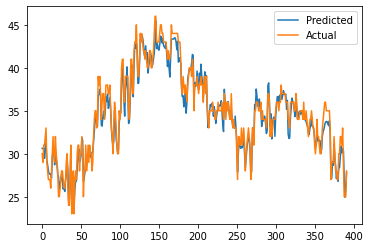

In [66]:
#Create dataframe for actual and predicted output values.
df = pd.DataFrame(y_, columns = ['Predicted']) 
y_test = pd.Series(y_test).array
df['Actual'] = y_test
print(df)
df.plot()


**Implementation of ridge regression**

In [67]:
#Cost function for ridge regression
def costFunctionReg(X,y,theta,lamda):
    m = len(y) 
    J = 0
    f = X @ theta
    J_regularizer = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (f - y).T @ (f - y)) + J_regularizer;
    return(J)

#'Gradient descent for ridge regression
def gradient_descent_reg(X,y,theta,alpha,lamda,num_iters):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        #Hypothesis function
        f = np.dot(X,theta)
        theta = theta - alpha * (1/m)* ((X.T @ (f-y)) + lamda * theta )      
        J_history[i] = costFunctionReg(X,y,theta,lamda)
  
    return theta ,J_history

First, we scale the features by using standardScaler from sklearn library

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

m = 1800 #number of raws for training
f = 11 #number of features
#splitting into training and testing 
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[m:]


Initializing Coefficients and apply gradient descent function to find the values of parameters for the model

In [68]:
B = np.zeros(X_train.shape[1])
alpha = 0.03
lemda = 0.1
iter_ = 5000
final_theta, cost_history = gradient_descent_reg(X_train, y_train, B,alpha,lemda,iter_)
print(final_theta)
def pred(x,theta):
    return np.dot(x,theta)

#prediction for test data
y_ = pred(X_test,final_theta)


[34.65655174  0.10980167  0.5973263  -0.04857889 -0.5723474   1.51038454
  2.6834329   0.46049225 -0.55290502 -0.53333753 -0.14939045  0.18160576]


0.9533228753397867
     Predicted  Actual
0    30.648793      30
1    30.595495      29
2    30.653079      31
3    29.467255      31
4    30.803017      32
..         ...     ...
387  30.395052      29
388  27.090054      25
389  24.961634      25
390  25.946412      25
391  27.834211      28

[392 rows x 2 columns]


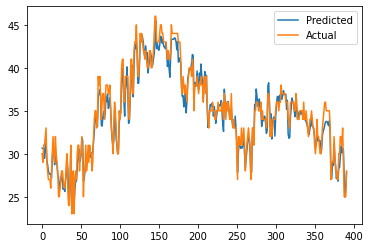

In [69]:
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
print(r2(y_,y_test))
#Create dataframe for actual and predicted output values.
df1 = pd.DataFrame(y_, columns = ['Predicted'])
y_test = pd.Series(y_test).array 
df1['Actual'] = y_test
print(df1)
df1.plot()

**Implementation of Lasso regression**

In [70]:
#Cost function for lasso regression
def costFunctionReg(X,y,theta,lamda):
    m = len(y) 
    J = 0
    f = X @ theta
    J_regularizer = (lamda / (2*m)) * np.sum(theta)
    J = float((1./(2*m)) * (f - y).T @ (f - y)) + J_regularizer;
    return(J)

#'Gradient descent for lasso regression
def gradient_descent_reg(X,y,theta,alpha,lamda,num_iters):
    m = np.size(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        #Hypothesis function
        f = np.dot(X,theta)
        theta = theta - alpha * (1/m)* (  (X.T @ (h-y)) + lamda)      
        J_history[i] = costFunctionReg(X,y,theta,lamda)
  
    return theta ,J_history

First, we scale the features by using standardScaler from sklearn library

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

m = 1800 #number of raws for training
f = 11 #number of features
#splitting into training and testing 
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[m:]

      sunHour  moon_illumination  ...  winddirDegree  windspeedKmph
0        10.8                 72  ...             62             20
1        10.9                 80  ...             70             16
2        10.9                 87  ...             90              9
3        10.9                 94  ...             68             13
4        10.9                100  ...             65             14
...       ...                ...  ...            ...            ...
2187     10.8                 85  ...            219             11
2188     10.8                 92  ...            100             13
2189     10.8                100  ...             49             16
2190     10.8                100  ...             44             17
2191     10.8                 89  ...             51             18

[2192 rows x 11 columns]
0       27
1       25
2       26
3       27
4       27
        ..
2187    29
2188    25
2189    25
2190    25
2191    28
Name: tempC, Length: 2192, dtype: int

Initializing Coefficients and apply gradient descent function to find the values of parameters for the model

In [72]:
B = np.zeros(X_train.shape[1])
alpha = 0.01
lemda = 0.1
iter_ = 5000
final_theta, cost_history = gradient_descent_reg(X_train, y_train, B,alpha,lemda,iter_)
print(final_theta)
def pred(x,theta):
    return np.dot(x,theta)


y_ = pred(X_test,final_theta)

[34.65881172  0.10569153  0.63405912 -0.04449095 -0.35849496  1.52740423
  2.53117443  0.45409318 -0.49974639 -0.77791346 -0.13819799  0.19615296]


0.952817876097923
     Predicted  Actual
0    30.704529      30
1    30.649016      29
2    30.685140      31
3    29.514034      31
4    30.836952      32
..         ...     ...
387  30.448525      29
388  27.072974      25
389  24.982669      25
390  25.984878      25
391  27.852032      28

[392 rows x 2 columns]


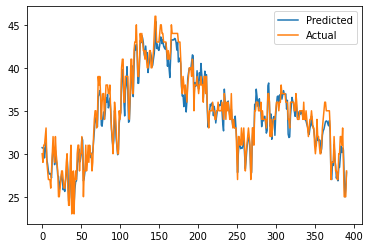

In [73]:
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
print(r2(y_,y_test))
#Create dataframe for actual and predicted output values.
df1 = pd.DataFrame(y_, columns = ['Predicted'])
y_test = pd.Series(y_test).array 
df1['Actual'] = y_test
print(df1)
df1.plot()